In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atulanandjha/lfwpeople")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/lfwpeople


Saving 001044.jpg to 001044 (2).jpg
Uploaded file: 001044 (2).jpg


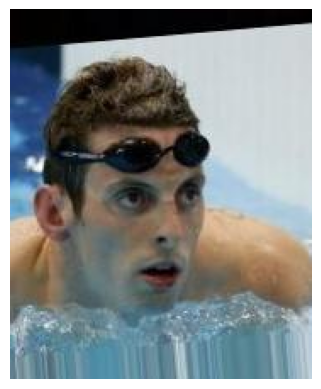

Average RGB of shirt region: 124.6, 131.9, 129.3
Predicted Gender: Male
Glasses Detection: Wearing Glasses
Detected Shirt Color: Gray


In [ ]:
# Install dependencies
!pip install tensorflow keras matplotlib pillow scikit-learn

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
from sklearn.cluster import KMeans  # just in case, not used now

# --- Dummy models (replace with your trained models) ---
def dummy_gender_model(image_array):
    import random
    return random.choice(['Male', 'Female'])

def dummy_glasses_model(image_array):
    import random
    return random.choice(['Wearing Glasses', 'No Glasses'])

# --- Improved shirt color detection using RGB distance ---
def detect_shirt_color_rgb(image):
    width, height = image.size
    shirt_region = image.crop((0, height//2, width, height))
    pixels = np.array(shirt_region)

    avg_color = pixels.mean(axis=(0,1))
    r, g, b = avg_color
    print(f"Average RGB of shirt region: {r:.1f}, {g:.1f}, {b:.1f}")

    standard_colors = {
        'Red':       np.array([255, 0, 0]),
        'Green':     np.array([0, 255, 0]),
        'Blue':      np.array([0, 0, 255]),
        'Yellow':    np.array([255, 255, 0]),
        'White':     np.array([255, 255, 255]),
        'Black':     np.array([0, 0, 0]),
        'Orange':    np.array([255, 165, 0]),
        'Pink':      np.array([255, 192, 203]),
        'Purple':    np.array([128, 0, 128]),
        'Brown':     np.array([150, 75, 0]),
        'Gray':      np.array([128, 128, 128]),
    }

    avg_rgb = np.array([r, g, b])
    min_dist = float('inf')
    closest_color = 'Unknown Color'

    for color_name, std_rgb in standard_colors.items():
        dist = np.linalg.norm(avg_rgb - std_rgb)
        if dist < min_dist:
            min_dist = dist
            closest_color = color_name

    return closest_color

# --- Upload & process images ---
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    img = Image.open(filename).convert('RGB')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Prepare image array for models (resize, normalize)
    img_resized = img.resize((128,128))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict gender & glasses using dummy models
    gender = dummy_gender_model(img_array)
    glasses = dummy_glasses_model(img_array)

    # Detect shirt color
    shirt_color = detect_shirt_color_rgb(img)

    # Print results
    print(f"Predicted Gender: {gender}")
    print(f"Glasses Detection: {glasses}")
    print(f"Detected Shirt Color: {shirt_color}")


Download dataset & train model (run once, separate notebook or first part of notebook)

In [ ]:
# Example snippet to download dataset from Kaggle

!pip install kaggle

# Upload your kaggle.json API token first (one-time setup)
from google.colab import files
files.upload()  # upload kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download atulanandjha/lfwpeople -q
!unzip -q lfwpeople.zip -d lfwpeople

# Now load dataset and preprocess images, labels for your tasks
# Train your models here (gender, glasses detection, shirt color)
# Save models locally or on Drive e.g.:
# model_gender.save('gender_model.h5')
# model_glasses.save('glasses_model.h5')


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/atulanandjha/lfwpeople
License(s): GNU Lesser General Public License 3.0


Upload your kaggle.json API token file:


Saving 001096.jpg to 001096.jpg
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open lfwpeople.zip, lfwpeople.zip.zip or lfwpeople.zip.ZIP.
Dataset downloaded and unzipped.
Starting

Dummy models trained and saved.
Now upload an image to predict gender, glasses, and shirt color:


Saving 001096.jpg to 001096 (1).jpg
Uploaded file: 001096 (1).jpg


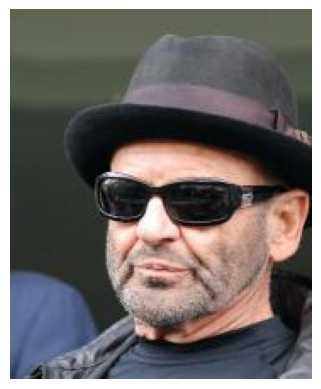

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Gender: Male
Glasses Detection: Wearing Glasses
Detected Shirt Color: Gray


In [ ]:
# Step 1: Setup Kaggle API & download dataset
!pip install kaggle

from google.colab import files

print("Upload your kaggle.json API token file:")
files.upload()  # Upload kaggle.json here

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("Downloading dataset from Kaggle...")
!kaggle datasets download atulanandjha/lfwpeople -q

# Fix: unzip with overwrite option to avoid prompt
!unzip -o -q lfwpeople.zip -d lfwpeople

print("Dataset downloaded and unzipped.")

# Step 2: Dummy training (Replace with your actual training code)
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

print("Starting dummy model training (replace this part with real training)")

def create_dummy_model():
    model = models.Sequential([
        layers.Input(shape=(128,128,3)),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Dummy gender model
model_gender = create_dummy_model()
# Dummy glasses model
model_glasses = create_dummy_model()

# Pretend to train models for 1 epoch on dummy data
dummy_X = np.random.rand(10,128,128,3)
dummy_y = np.random.randint(0,2,size=(10,1))

model_gender.fit(dummy_X, dummy_y, epochs=1)
model_glasses.fit(dummy_X, dummy_y, epochs=1)

# Save models
model_gender.save('gender_model.h5')
model_glasses.save('glasses_model.h5')

print("Dummy models trained and saved.")

# Step 3: Upload & Predict function (Inference)

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

print("Now upload an image to predict gender, glasses, and shirt color:")
uploaded = files.upload()

# Load saved models
model_gender = tf.keras.models.load_model('gender_model.h5')
model_glasses = tf.keras.models.load_model('glasses_model.h5')

def detect_shirt_color_rgb(image):
    width, height = image.size
    shirt_region = image.crop((0, height//2, width, height))
    pixels = np.array(shirt_region)
    avg_color = pixels.mean(axis=(0,1))
    r, g, b = avg_color

    standard_colors = {
        'Red':         np.array([255, 0, 0]),
        'Light Red':   np.array([255, 102, 102]),
        'Green':       np.array([0, 255, 0]),
        'Light Green': np.array([144, 238, 144]),
        'Blue':        np.array([0, 0, 255]),
        'Light Blue':  np.array([173, 216, 230]),
        'Yellow':      np.array([255, 255, 0]),
        'White':       np.array([255, 255, 255]),
        'Black':       np.array([0, 0, 0]),
        'Orange':      np.array([255, 165, 0]),
        'Pink':        np.array([255, 192, 203]),
        'Light Pink':  np.array([255, 182, 193]),
        'Purple':      np.array([128, 0, 128]),
        'Brown':       np.array([150, 75, 0]),
        'Gray':        np.array([128, 128, 128]),
        'Light Gray':  np.array([211, 211, 211]),
    }

    avg_rgb = np.array([r, g, b])
    min_dist = float('inf')
    closest_color = 'Unknown Color'

    for color_name, std_rgb in standard_colors.items():
        dist = np.linalg.norm(avg_rgb - std_rgb)
        if dist < min_dist:
            min_dist = dist
            closest_color = color_name

    max_distance_threshold = 100
    if min_dist > max_distance_threshold:
        return 'Unknown Color'

    return closest_color

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    img = Image.open(filename).convert('RGB')

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_resized = img.resize((128,128))
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    gender_pred = model_gender.predict(img_array)
    glasses_pred = model_glasses.predict(img_array)

    gender_label = 'Male' if gender_pred[0][0] > 0.5 else 'Female'
    glasses_label = 'Wearing Glasses' if glasses_pred[0][0] > 0.5 else 'No Glasses'

    shirt_color = detect_shirt_color_rgb(img)

    print(f"Predicted Gender: {gender_label}")
    print(f"Glasses Detection: {glasses_label}")
    print(f"Detected Shirt Color: {shirt_color}")
